# Boston Housing Dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

## Introduction

It's a popular housing dataset, housing and statistic models are quite intertwined. This is a simple regression analysis. There's not enough data to go deeper than that, we could obviously evaluate it, and we will, but 500 rows, for data science, is very, very little

### References

- https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

### Features

**_crim_**\
per capita crime rate by town.

**_zn_**\
proportion of residential land zoned for lots over 25,000 sq.ft.

**_indus_**\
proportion of non-retail business acres per town.

**_chas_**\
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**_nox_**\
nitrogen oxides concentration (parts per 10 million).

**_rm_**\
average number of rooms per dwelling.

**_age_**\
proportion of owner-occupied units built prior to 1940.

**_dis_**\
weighted mean of distances to five Boston employment centres.

**_rad_**\
index of accessibility to radial highways.

**_tax_**\
full-value property-tax rate per \$10,000.

**_ptratio_**\
pupil-teacher ratio by town.

**_black_**\
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**_lstat_**\
lower status of the population (percent).

**_medv_**\
median value of owner-occupied homes in \$1000s.

 ## Initialization

In [1]:
RANDOM_SEED = 42 #@param {type: 'integer'}

### Imports

In [2]:
import pandas as pd
import numpy as np
np.random.seed(RANDOM_SEED)
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

This will soon be deprecated, until then, we're safe, but, if it were to deprecate, you could just download the dataset yourself, or use the `fetch_openml` functionality

In [3]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
  # You should probably not use this dataset.
  warnings.filterwarnings("ignore")
  data = load_boston()

In [4]:
feature_names = data['feature_names']
target_name = 'MEDV'
dataframe = pd.DataFrame(data['data'], columns=feature_names)
dataframe[target_name] = data['target']

## Data cleansening

### Missing values

Values that should be there, but are not, empty cells/attributes/features.

In [5]:
df = dataframe.copy(deep=True)

In [6]:
df.isna().sum() / len(df)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [7]:
df.isna().sum().sum() / (len(df) * df.shape[1])

0.0

### Abnormal values

Values that do not make any sense or should not be possible given what that value is meaning.

In [47]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Exploratory Data Analysis

We should be able to identify any hypothesis, or to discard any value that may not be optimal

### Correlation

The quantity that one value represents/influence the change into another one.

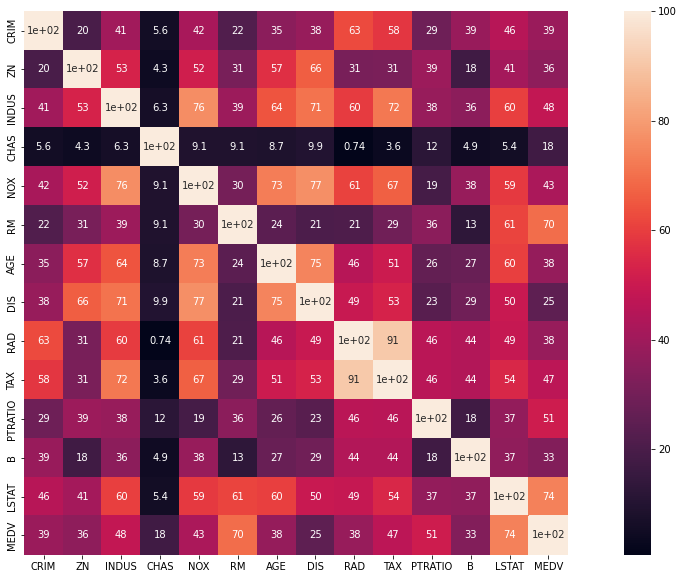

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs() * 100, annot=True, fmt='.2g', square=True)

### Data distribution

Given a range of values for a feature, how even are the quantity of values for each range between the feature. The better distributed (more even), the better the feature for our model

Histplot allows us to easily identify the ranges of values and it's quantity compared with it's neighbours

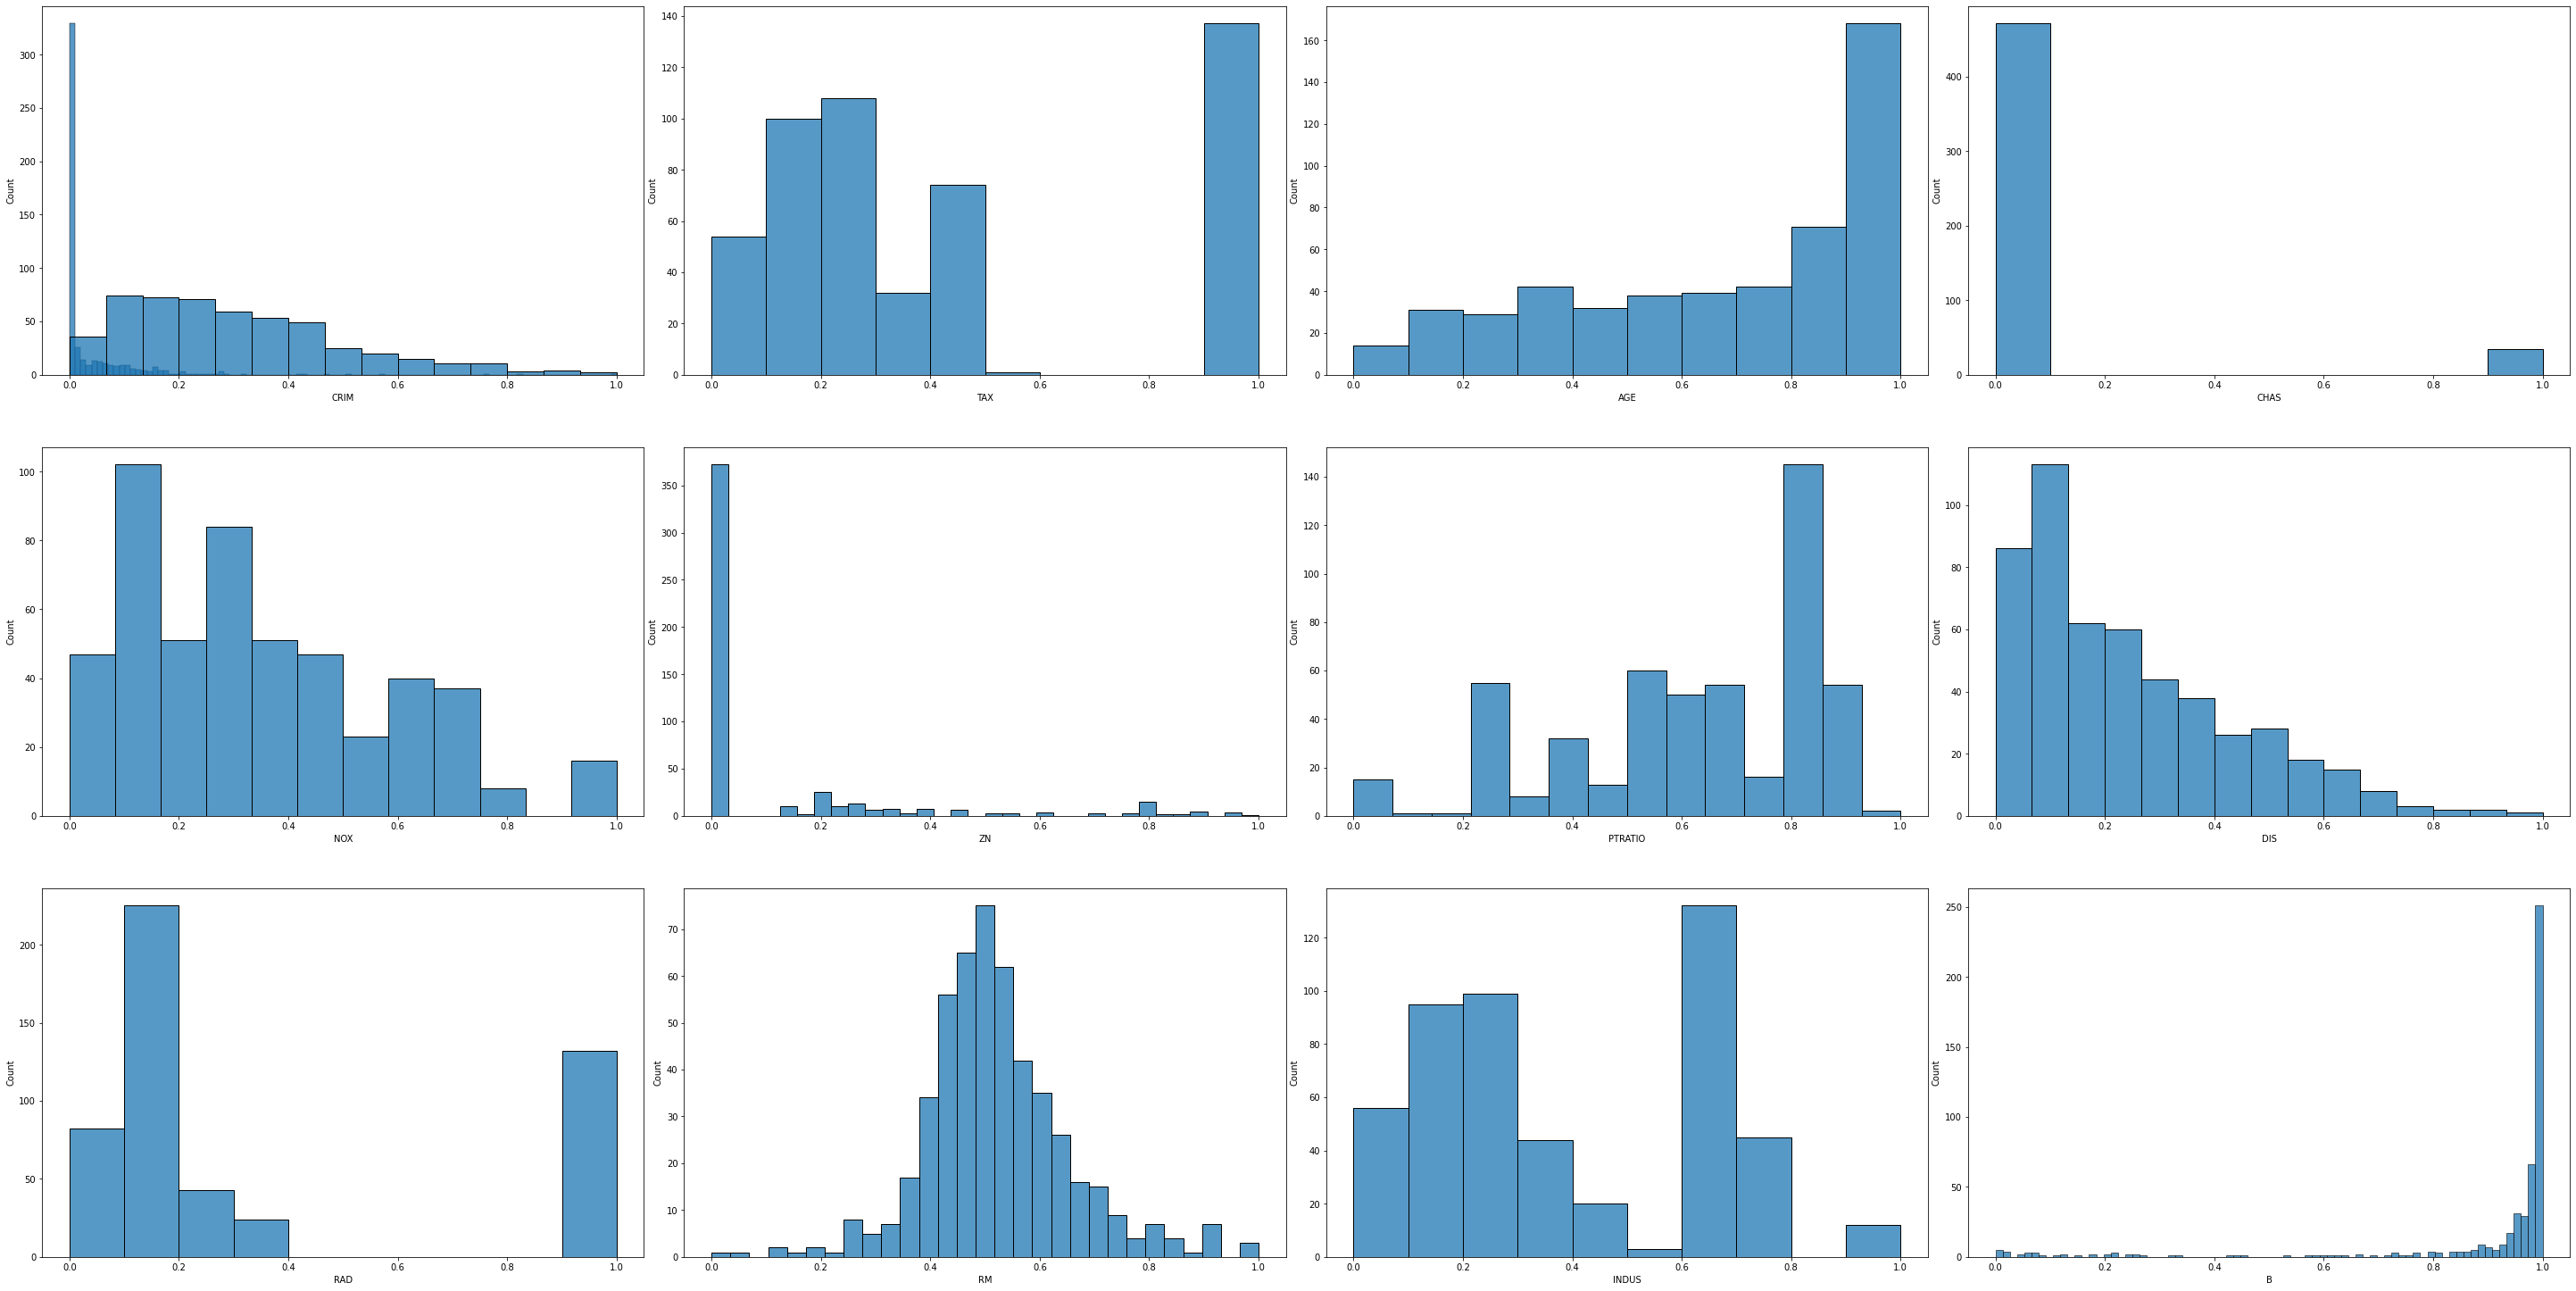

In [54]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = df[feature_names]
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=x.columns)
fig, axes = plt.subplots(3, 4, figsize=(40, 20))
axes.flatten()
for index, col in enumerate(x.columns):
  # sns.kdeplot(data=x, x=col, ax=axes[int(index % 3), int(index / 4)])
  sns.histplot(data=x, x=col, ax=axes[int(index % 3), int(index % 4)])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Boxplot not only shows the quartils, it also shows the outliers (values out of the scope).

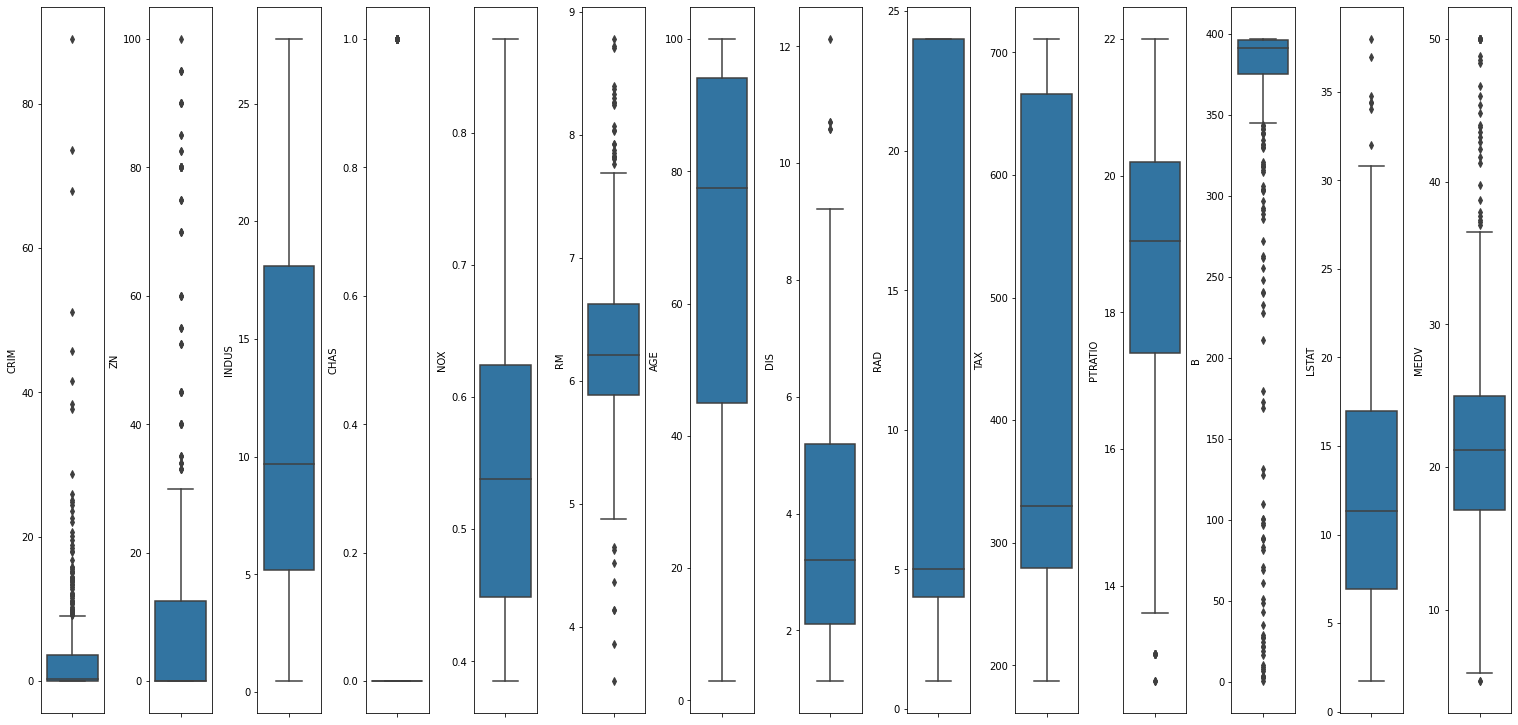

In [10]:
n_cols = df.shape[1]
fig, axes = plt.subplots(1, n_cols, figsize=(n_cols * 1.5, 10))
for index, col in enumerate(df.columns):
  sns.boxplot(data=df, y=col, ax=axes[index])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Plotting the regression

Straight from: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

With a couple of modifications here and there. It allows us to see how much a feature influences the target's value, in this example, all of them do, wether higher or lower, they do influence the target value.

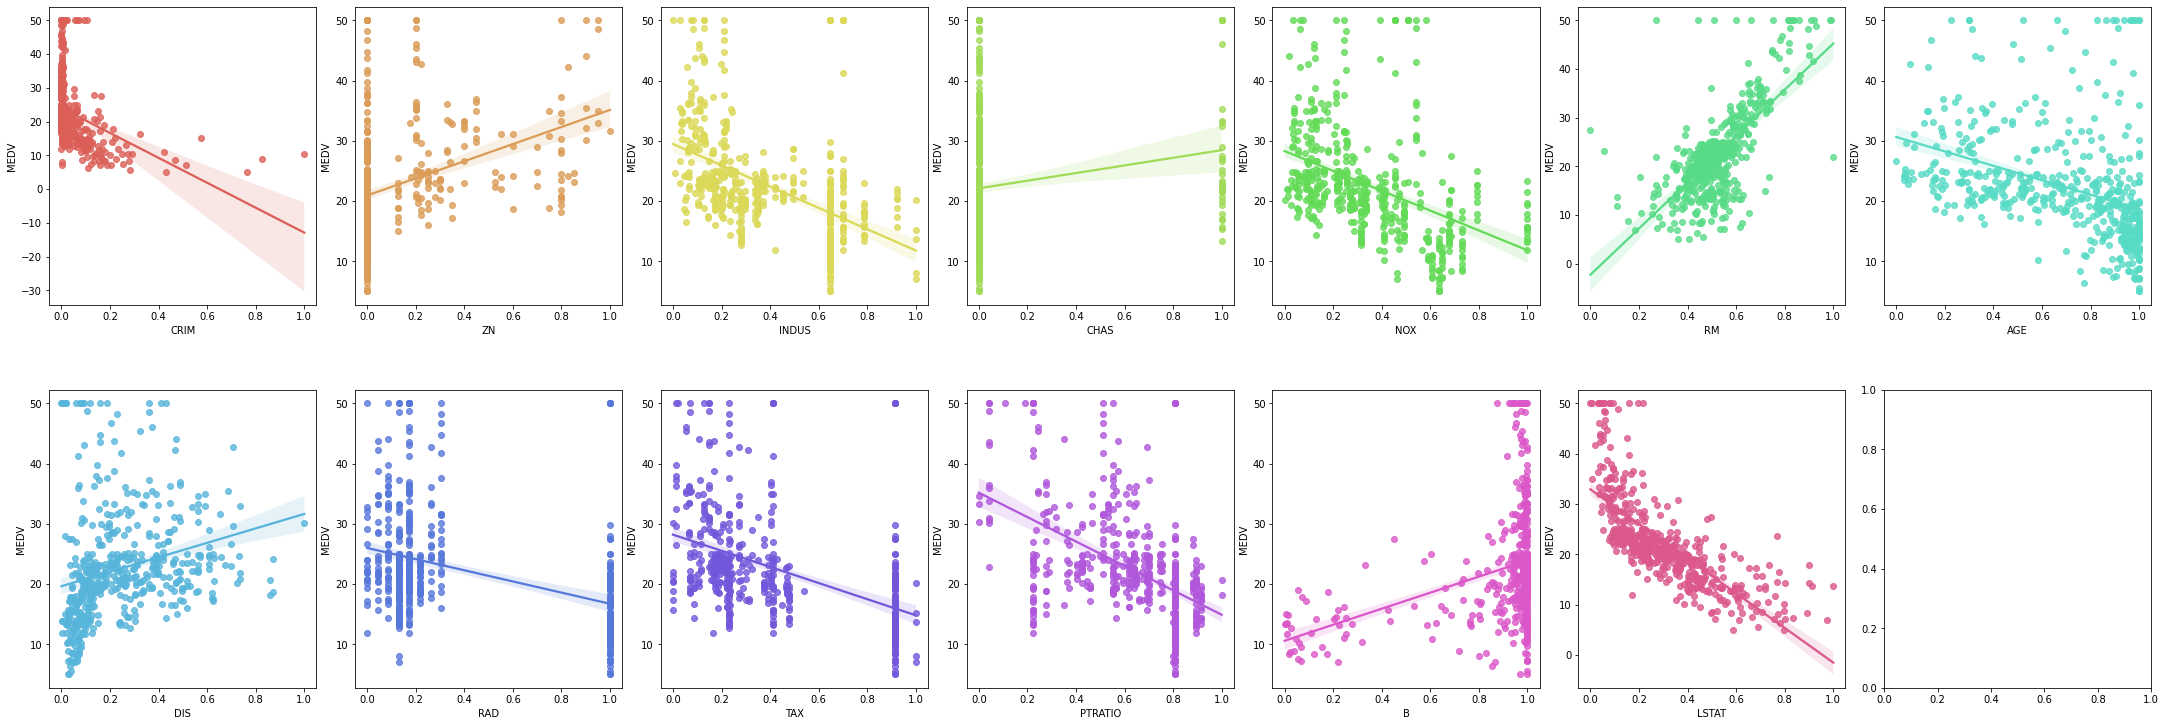

In [11]:
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
# column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
column_sels = feature_names
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
# x = pd.DataFrame(data=x, columns=column_sels)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(30, 10))
index = 0
palette = sns.color_palette('hls', len(column_sels))
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i], color=palette[i], seed=RANDOM_SEED)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### What are we trying to predict?

The median value of the occupancy, let's sort the values to see the shape they form

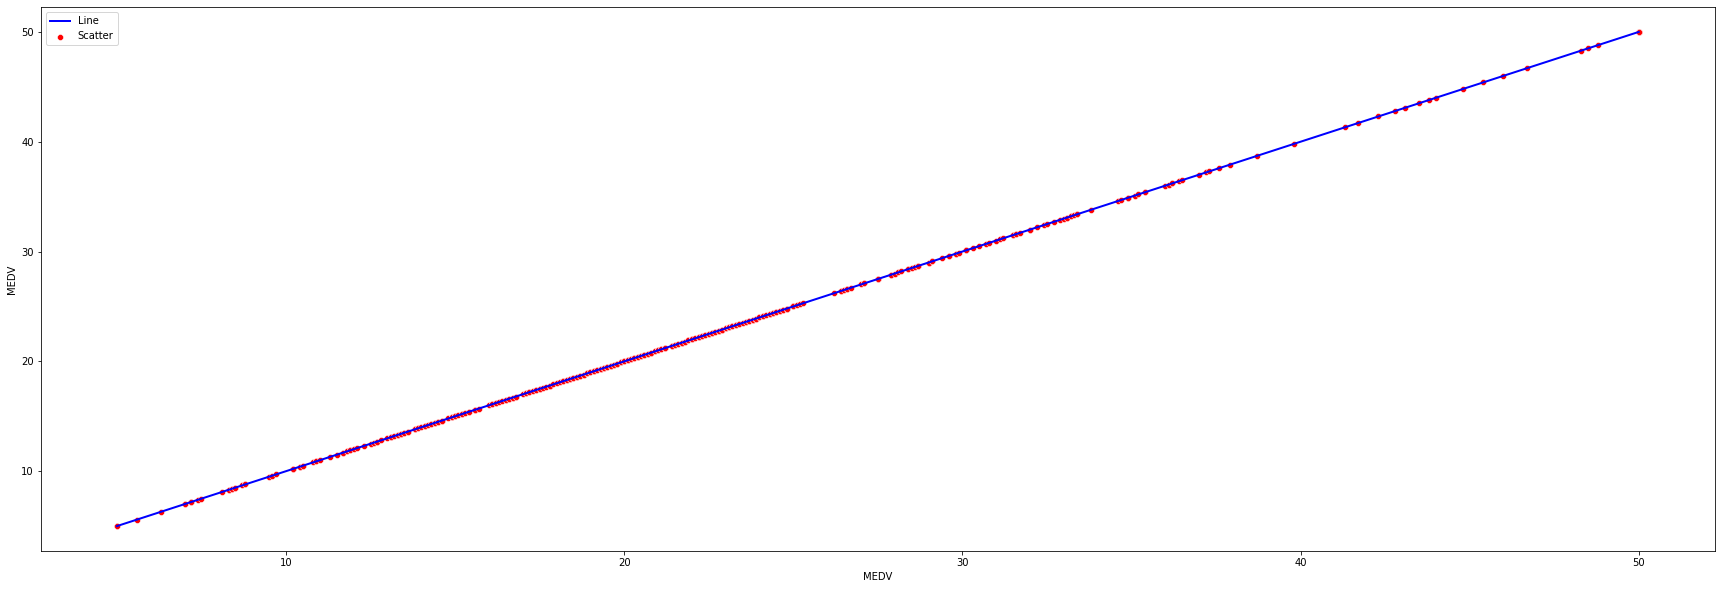

In [67]:
df_sorted = df.sort_values(by=target_name, ascending=True)
plt.figure(figsize=(30, 10))
sns.lineplot(data=df_sorted, x=target_name, y=target_name, color='blue', label='Line', lw=2)
sns.scatterplot(data=df_sorted, x=target_name, y=target_name, color='red', label='Scatter')

## Data Science

Here we'll test/try out some algorithms that may actually be better

In [12]:
ignore_features = [
  'CHAS',
  'RAD',
]
train_feature_names = [ col for col in feature_names if col not in ignore_features ]

In [13]:
X = df[train_feature_names]
# X = df[column_sels]
y = df[target_name]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.4, random_state=RANDOM_SEED)

### Imports

In [15]:
# algorithms
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import tensorflow as tf

# normalizers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
# decomposer
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import r2_score

### Base pipeline

As to better work with the models, we'll be using a pipeline so that everything is automated

In [16]:
def pipeline_model(
  algorithm,
  normalizer = None,
  imputer = None,
  decomposer = None,
  poly_degrees = None,
):
  assert algorithm is not None

  steps = []

  if imputer:
    steps.append(['imputer', imputer])

  if poly_degrees:
    steps.append(['polynomial', PolynomialFeatures(poly_degrees)])

  if normalizer:
    steps.append(['normalizer', normalizer])

  if decomposer:
    steps.append(['decomposer', decomposer])

  steps.append(['algorithm', algorithm])

  return Pipeline(steps=steps)

### PCA explainability

To understand which number of components is the best, we should be plotting it's explainability variance ratio

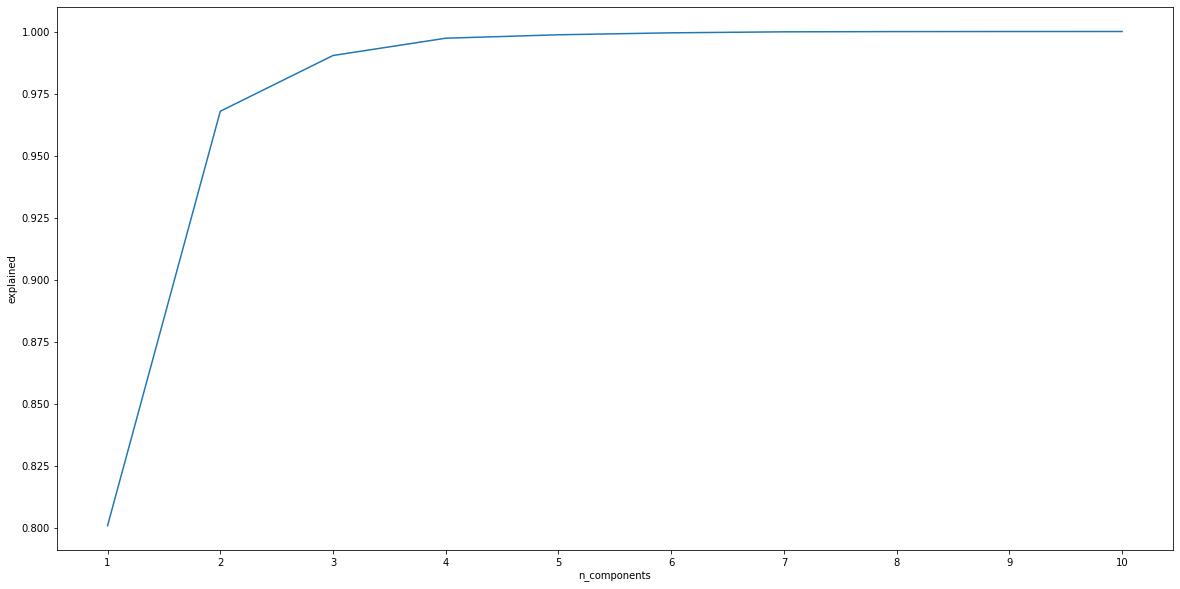

In [17]:
explainability = []
for n_components in range(1, X.shape[1]):
  explained = PCA(n_components).fit(X_train, y_train).explained_variance_ratio_.sum()
  explainability.append(
    (n_components, explained)
  )
plt.figure(figsize=(20, 10))
df_explainability = pd.DataFrame(explainability, columns=['n_components', 'explained'])
plt.xticks(range(1, X.shape[1]))
sns.lineplot(data=df_explainability, x='n_components', y='explained')

### Polynomial explainability

As with PCA's number of components, we do the same.

In [18]:
explainability = []
for degrees in range(1, 8):
  decomposer = PolynomialFeatures(degrees).fit(X_train, y_train)
  model = LinearRegression().fit(decomposer.transform(X_train), y_train)
  explained = model.score(decomposer.transform(X_test), y_test)
  explainability.append(
    (degrees, explained)
  )

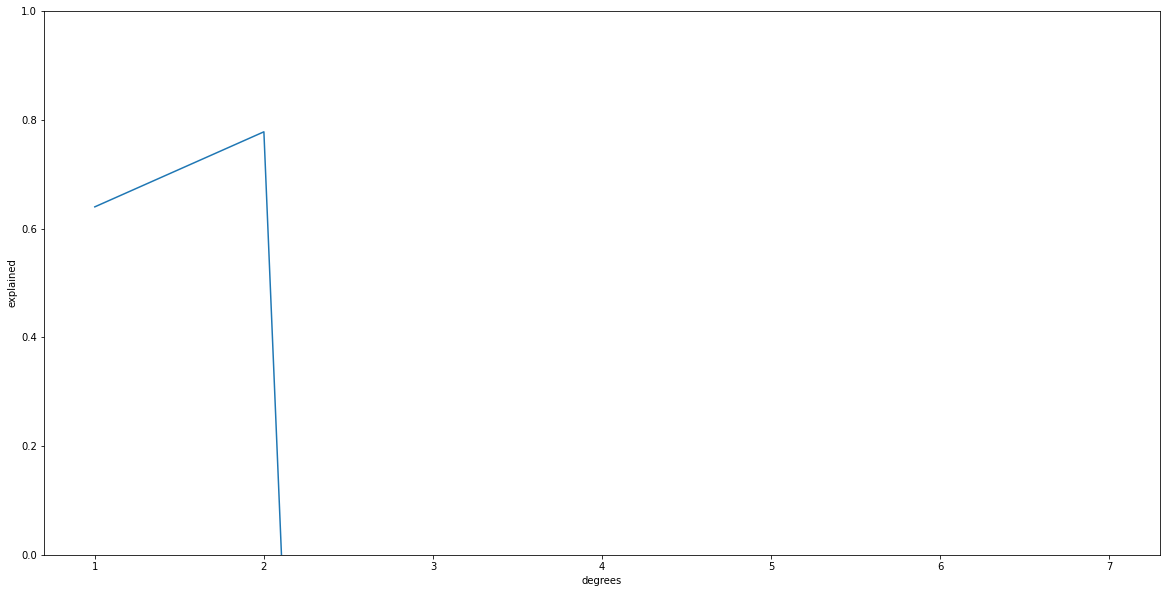

In [19]:
plt.figure(figsize=(20, 10))
df_explainability = pd.DataFrame(explainability, columns=['degrees', 'explained'])
plt.xticks(range(1, X.shape[1]))
plt.ylim(0, 1)
sns.lineplot(data=df_explainability, x='degrees', y='explained')

### Linear Regression

We saw a line while plotting the results, so, a linear regressiong shouldn't be too far off

In [20]:
lin_regr = pipeline_model(
  algorithm=LinearRegression(),
  # normalizer=MinMaxScaler(),
  # decomposer=PCA(n_components=2),
  poly_degrees=2
)
lin_regr.fit(X_train, y_train)
display(lin_regr.score(X_test, y_test))
display(lin_regr.score(X_val, y_val))
lin_regr_score = lin_regr.score(X_test, y_test)
lin_regr_score

0.7781230825830393

0.8415078878565828

0.7781230825830393

#### Explained

Can't really be explained since the Polynomial features are applied to it

### XGBoost

A powerful gradient boosted forest with regularization

In [21]:
from xgboost import XGBRegressor

In [22]:
xgb_regr = pipeline_model(
  algorithm=XGBRegressor(random_state=RANDOM_SEED, objective='reg:squarederror'),
  normalizer=MinMaxScaler(),
  # decomposer=PCA(n_components=5),
  # poly_degrees=2
)
xgb_regr.fit(X_train, y_train)
display(xgb_regr.score(X_test, y_test))
display(xgb_regr.score(X_val, y_val))
xgb_regr_score = xgb_regr.score(X_test, y_test)
xgb_regr_score

0.8941075943819277

0.9108406977673152

0.8941075943819277

#### Explained

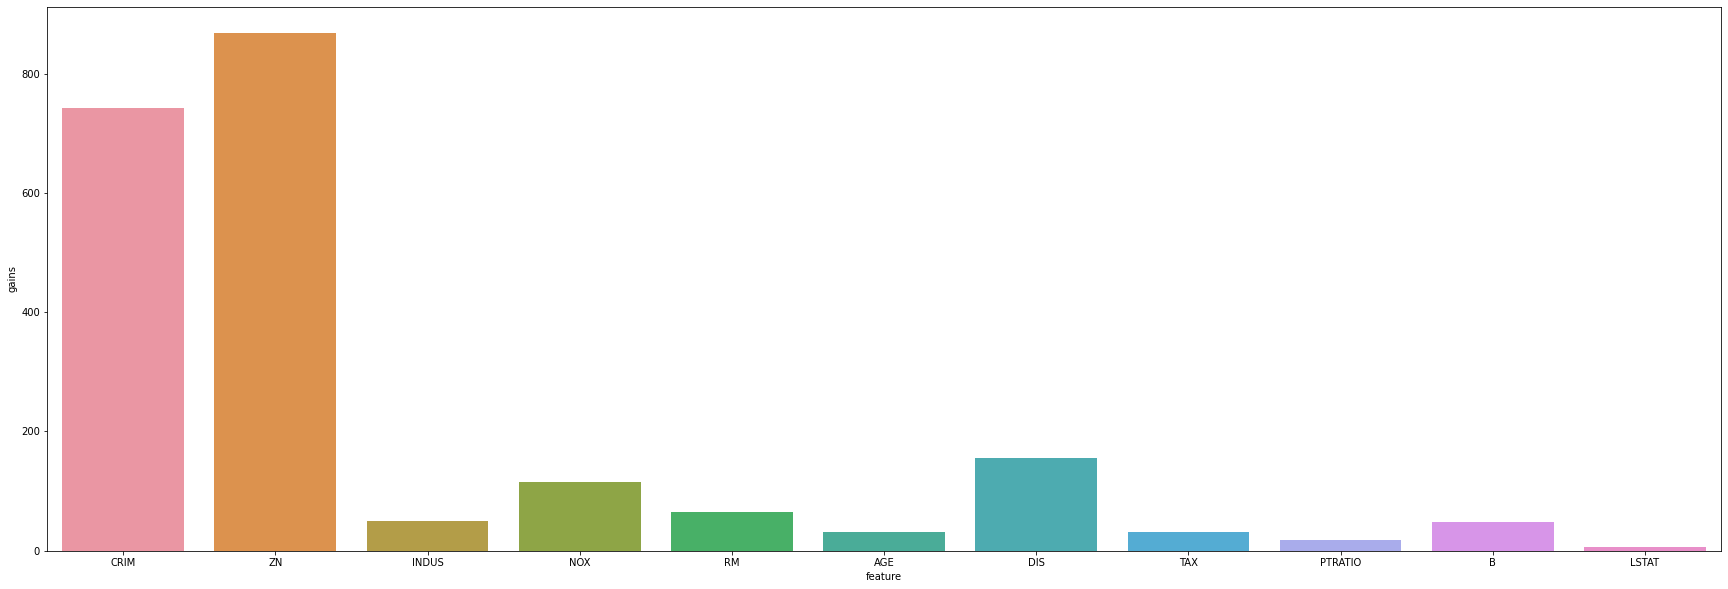

In [23]:
df_feature_gains_xgb = pd.DataFrame(
  zip(
    train_feature_names,
    xgb_regr['algorithm'].get_booster().get_score(importance_type='gain').values()
  ),
  columns=['feature', 'gains']
)
# df_feature_gains_xgb['gains'] = df_feature_gains_xgb['gains'] / df_feature_gains_xgb['gains'].max()
plt.figure(figsize=(30, 10))
sns.barplot(data=df_feature_gains_xgb, x='feature', y='gains')

### Random Forest

A forest of decission trees in which the best one survives

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf_regr = pipeline_model(
  algorithm=RandomForestRegressor(random_state=RANDOM_SEED),
  normalizer=MinMaxScaler(),
  # decomposer=PCA(n_components=2),
  # poly_degrees=2
)
rf_regr.fit(X_train, y_train)
display(rf_regr.score(X_test, y_test))
display(rf_regr.score(X_val, y_val))
rf_regr_score = rf_regr.score(X_test, y_test)
rf_regr_score

0.8603458002669537

0.9203027773766257

0.8603458002669537

#### Explained

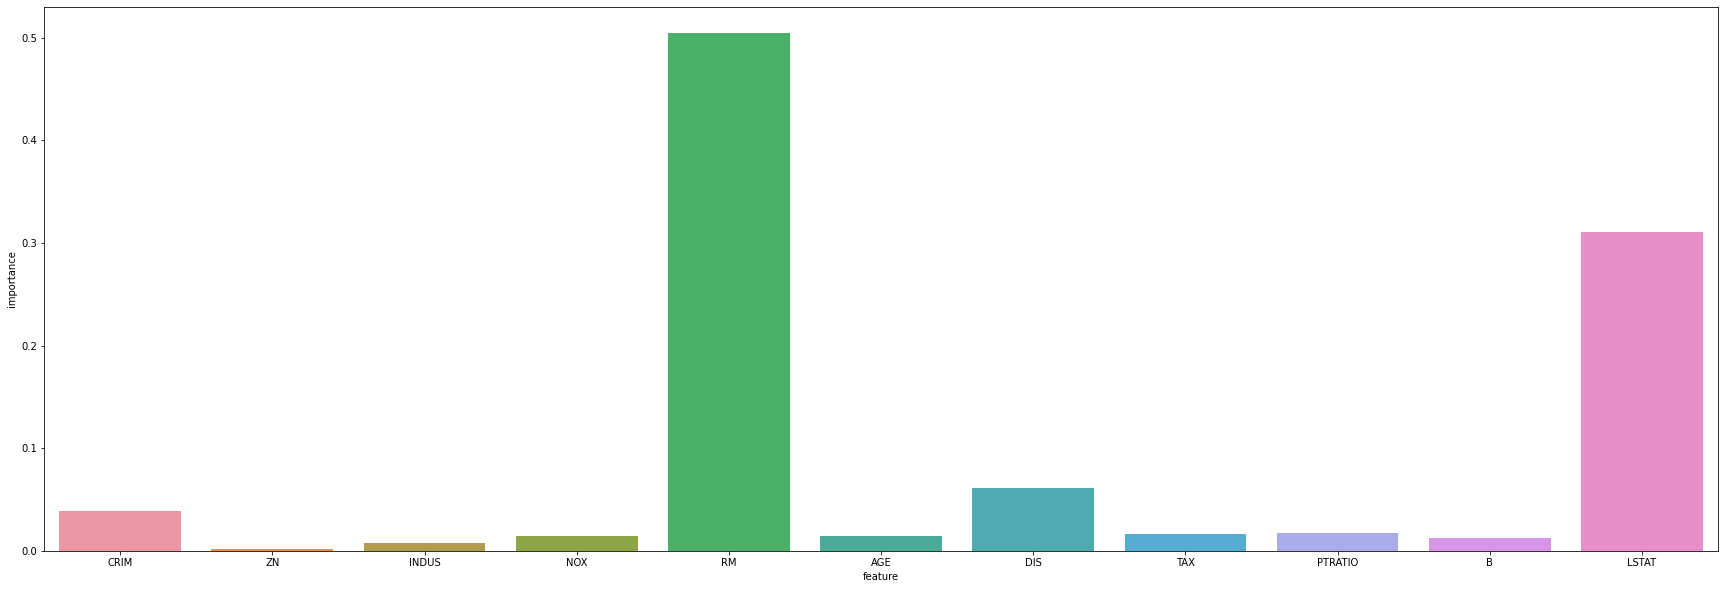

In [26]:
df_feature_importances = pd.DataFrame(
  zip(train_feature_names, rf_regr['algorithm'].feature_importances_),
  columns=['feature', 'importance']
)
plt.figure(figsize=(30, 10))
sns.barplot(data=df_feature_importances, x='feature', y='importance')

### Neural networks

A series of neurons that use an activation function, weights and biases for each layer to predict the outcome

Normalize the training data

In [27]:
train_min = X_train.min()
train_max = X_train.max()

X_train_norm = (X_train - train_min) / (train_max - train_min)
# X_train_norm = X_train
X_val_norm = (X_val - train_min) / (train_max - train_min)
# X_val_norm = X_val
X_test_norm = (X_test - train_min) / (train_max - train_min)
# X_test_norm = X_test

And also normalize the target, so that everything is at the same scale

In [28]:
target_min = y_train.min()
target_max = y_train.max()

y_train_norm = (y_train - target_min) / (target_max - target_min)
# y_train_norm = y_train
y_val_norm = (y_val - target_min) / (target_max - target_min)
# y_val_norm = y_val
y_test_norm = (y_test - target_min) / (target_max - target_min)
# y_test_norm = y_test

The model itself and it's architecture

In [29]:
model = tf.keras.Sequential(
  name='Regression',
  layers=[
    tf.keras.layers.Dense(
      units=X_train.shape[1], input_dim=X_train.shape[1], name='Input-layer',
    ),
    tf.keras.layers.Dense(
      units=128, activation='relu', name='Hidden-layer',
    ),
    tf.keras.layers.Dense(
      units=64, activation='relu', name='Second-Hidden-layer',
    ),
    tf.keras.layers.Dense(
      units=1, activation='linear', name='Output-layer',
      
    ),
  ]
)

model.compile(
  loss=tf.losses.mean_absolute_error,
  # loss=tf.losses.mean_squared_error,
  optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
  # optimizer=tf.keras.optimizers.Adam(learning_rate=.1),
)

model.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-layer (Dense)         (None, 11)                132       
                                                                 
 Hidden-layer (Dense)        (None, 128)               1536      
                                                                 
 Second-Hidden-layer (Dense)  (None, 64)               8256      
                                                                 
 Output-layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 9,989
Trainable params: 9,989
Non-trainable params: 0
_________________________________________________________________


We train the data, 100 epochs even with a small dataset to train the data, too little may underfit it.

In [30]:
history = model.fit(
  X_train_norm,
  y_train_norm,
  epochs=100,
  validation_data=(X_val_norm, y_val_norm),
  shuffle=True,
  verbose=0,
)

And we calculate the score ourselves

In [31]:
model.evaluate(X_test_norm, y_test_norm)
display('test', r2_score(y_test_norm, model.predict(X_test_norm)))
display('val', r2_score(y_val_norm, model.predict(X_val_norm)))
display('train', r2_score(y_train_norm, model.predict(X_train_norm)))

2/2 [==============================] - 0s 8ms/step - loss: 0.0468


'test'

0.8529057067971344

'val'

0.8599560999741962

'train'

0.9248417475744297

### Explained

We could plot out their weights and biases, but it would not give too much insight for this precise example

## Submission

If you don't intend to actually submit the result to kaggle, there's no need to follow this steps

### Prepare Kaggle

In Google Colab, kaggle requires of an authentication process, always.

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
%pip install kaggle -q
%cp "/content/drive/MyDrive/Colab Notebooks/Kaggle/jofaval-kaggle.json" "kaggle.json"
%mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [34]:
!kaggle competitions download -c boston-housing -q
!unzip -oq boston-housing.zip

### Example evaluation

We can play around and see what the data is all about, and how we should format the submission

In [35]:
df_submission_example = pd.read_csv('submission_example.csv')
df_submission_example.head(1)

,ID,medv
0,3,22.768769


### Test submission preparation

Now that we have ourselves the submission format ready, we must put it to use, and to train the data with the actual dataset

In [36]:
df_train = pd.read_csv('train.csv')
df_train.head(1)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [45]:
len(df_train)

333

In [37]:
lowercase_train_feature_names = [ col.lower() for col in train_feature_names if col.lower() in df_train.columns and col not in ['ID'] ]

In [38]:
submission_regr = pipeline_model(
  algorithm=XGBRegressor(random_state=RANDOM_SEED),
  normalizer=MinMaxScaler(),
)

In [39]:
submission_regr.fit(df_train[lowercase_train_feature_names], df_train[target_name.lower()])

[17:40:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('normalizer', MinMaxScaler()),
                ('algorithm', XGBRegressor(random_state=42))])

In [40]:
df_test = pd.read_csv('test.csv')
df_test.head(1)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [46]:
len(df_test)

173

In [41]:
df_submission = pd.DataFrame(df_test['ID'], columns=['ID'])
df_submission['medv'] = submission_regr.predict(df_test[lowercase_train_feature_names])

### Actual submission

In [42]:
SUBMISSION_FILENAME = 'jofaval-boston-housing-submission.csv' #@param {type: 'string'}

To actually submit the file, we should be saving the predictions to a dataset, when using pandas, we must turn off the index

In [43]:
df_submission.to_csv(SUBMISSION_FILENAME, index=False)
%ls -al

total 80
drwxr-xr-x 1 root root  4096 Jul 10 17:40 ./
drwxr-xr-x 1 root root  4096 Jul 10 11:57 ../
-rw-r--r-- 1 root root 14183 Jul 10 17:19 boston-housing.zip
drwxr-xr-x 4 root root  4096 Jul  6 13:21 .config/
drwx------ 5 root root  4096 Jul 10 11:58 drive/
-rw-r--r-- 1 root root  2347 Jul 10 17:40 jofaval-boston-housing-submission.csv
drwxr-xr-x 1 root root  4096 Jul  6 13:22 sample_data/
-rw-r--r-- 1 root root  3605 Nov 27  2019 submission_example.csv
-rw-r--r-- 1 root root 11755 Nov 27  2019 test.csv
-rw-r--r-- 1 root root 24128 Nov 27  2019 train.csv


And actually submit the values

In [44]:
!kaggle c submit boston-housing -f $SUBMISSION_FILENAME -m 'XGBoostRegressor using MinMaxScaler'

100% 2.29k/2.29k [00:00<00:00, 11.2kB/s]
Successfully submitted to Boston Housing

## Conclusions

XGBoost and RandomForest are powerful techniques, if I had to choose one so myself (and I had to) I'd user XGBoost, there's no need for deep explainability of our model, nor any restriction as to using supervised and unsupervised methods.

And, all of the values, no matter what the unsupervised models say, do contribute to the target's value prediction. It's just that ones do so more than others.